# Business Understanding

This is the data from company to predict nominal zakat. So, we collect the history of the nominal zakat from every person


# Data Understanding

The data we collect from company directly include age, gender, nominal, and periode_transaksi.
- age -> age of person
- gender -> the gender of person
- nominal -> nominal zakat of person
- periode_transaksi -> transaction period of person


## Import Library, Read Data, and show data.


### Import Library

First, lets import the library include numpy, pandas, matplotlib, seaborn, and scikit-learn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

### Read and show the data

Lets read and show the data with pandas

In [2]:
df = pd.read_csv("./data_test1.csv")
df.head()

,umur,gender,occupation,nominal,periode_transaksi
0,62,1,NIA. 01050001,800000,2
1,4,1,NIA. 13030039,375000,2
2,72,0,Ketua Dewan Pengawas Syariah PT PNM,5000000,2
3,80,0,NIA. A15080002,1237500,2
4,62,1,NIA. 01050001,800000,2


# Data Preparation

We have read and show the data and there is some problem with the data. So, the next step we will cleaning and do Exploratory Data Analysis (EDA) for this data.

## Cleaning Data

Lets clean it first

In [3]:
df.head(5)

,umur,gender,occupation,nominal,periode_transaksi
0,62,1,NIA. 01050001,800000,2
1,4,1,NIA. 13030039,375000,2
2,72,0,Ketua Dewan Pengawas Syariah PT PNM,5000000,2
3,80,0,NIA. A15080002,1237500,2
4,62,1,NIA. 01050001,800000,2


In [4]:
df.isnull().sum()

umur                 0
gender               0
occupation           0
nominal              0
periode_transaksi    0
dtype: int64

In [5]:
for i in range(len(df)):
    if "NIA" in df.loc[i, "occupation"]:
        df.loc[i, "occupation"] = "Amil"
    elif "*" in df.loc[i, "occupation"]:
        df.drop(i, axis=0, inplace=True)

In [6]:
df.duplicated().sum()

3678

In [7]:
df[df.duplicated(keep=False)]

,umur,gender,occupation,nominal,periode_transaksi
0,62,1,Amil,800000,2
1,4,1,Amil,375000,2
2,72,0,Ketua Dewan Pengawas Syariah PT PNM,5000000,2
3,80,0,Amil,1237500,2
4,62,1,Amil,800000,2
...,...,...,...,...,...
8145,69,0,Amil,475000,2
8146,69,0,Wiraswasta,100000,2
8147,69,0,Amil,475000,0
8150,69,0,Amil,475000,0


In [8]:
df.shape

(7814, 5)

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(4136, 5)

In [10]:
df

,umur,gender,occupation,nominal,periode_transaksi
0,62,1,Amil,800000,2
1,4,1,Amil,375000,2
2,72,0,Ketua Dewan Pengawas Syariah PT PNM,5000000,2
3,80,0,Amil,1237500,2
7,65,0,Jasa Boga,25000000,2
...,...,...,...,...,...
8143,69,0,Amil,600000,1
8147,69,0,Amil,475000,0
8148,69,0,Wiraswasta,100000,0
8149,69,0,Amil,2500000,0


## Exploratory Data Analysis (EDA)

Lets do Exploratory Data Analysis about this

### Univariate Analysis

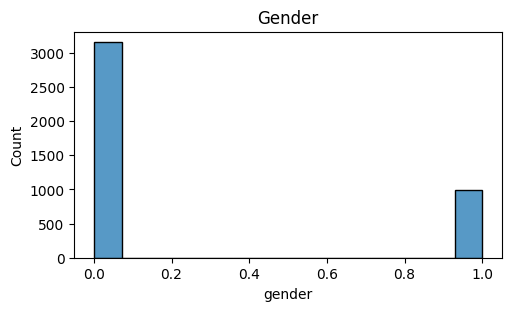

0    3150
1     986
Name: gender, dtype: int64


In [11]:
# Univariate for categorical variables of gender

fig, ax = plt.subplots(figsize=(5, 3), layout="constrained")
sns.histplot(data=df["gender"], ax=ax)
ax.set_title("Gender")
plt.show()
print(df["gender"].value_counts())

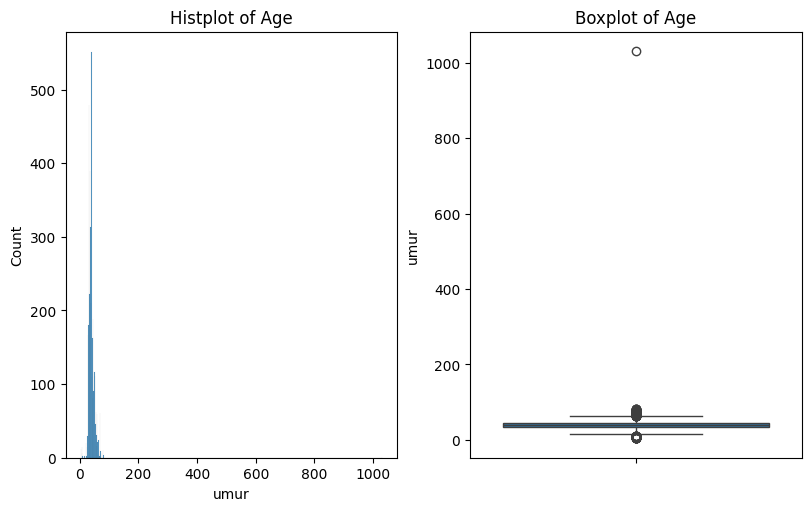

count    4136.000000
mean       40.125484
std        18.324852
min         4.000000
25%        33.000000
50%        39.000000
75%        45.000000
max      1031.000000
Name: umur, dtype: float64


In [12]:
# Univariate Analysis of Numerical variables Umur
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["umur"], ax=ax[0])
sns.boxplot(data=df["umur"], ax=ax[1])
ax[0].set_title("Histplot of Age")
ax[1].set_title("Boxplot of Age")
plt.show()
print(df["umur"].describe())

In [13]:
for i in df.index:
    if df.loc[i, "umur"] >= 200:
        df.loc[i, "umur"] = df.loc[i, "umur"] // 33


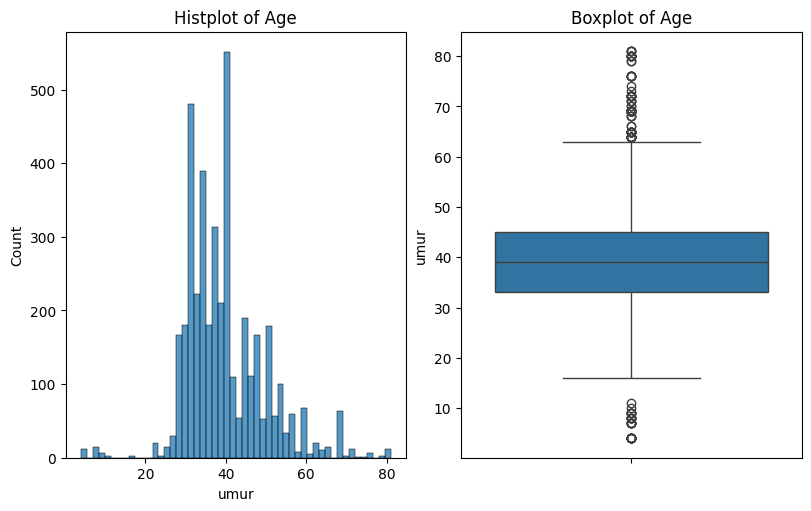

count    4136.000000
mean       39.883704
std         9.915521
min         4.000000
25%        33.000000
50%        39.000000
75%        45.000000
max        81.000000
Name: umur, dtype: float64


In [14]:
# Univariate Analysis of Numerical variables Umur
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["umur"], ax=ax[0])
sns.boxplot(data=df["umur"], ax=ax[1])
ax[0].set_title("Histplot of Age")
ax[1].set_title("Boxplot of Age")
plt.show()
print(df["umur"].describe())

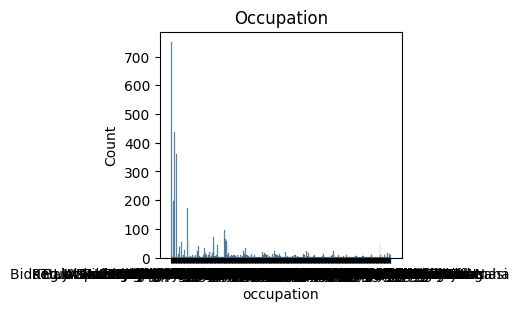

Amil                         749
Tidak Bekerja                437
Wiraswasta                   362
Pegawai Negeri Sipil         198
PNS                          173
                            ... 
Trading                        1
Fuel Trading                   1
PNS/Aparatur Sipil Negara      1
EPC                            1
Lain-lain                      1
Name: occupation, Length: 298, dtype: int64


In [15]:
# Univariate Analysis for categorical variables of occupation
fig, ax = plt.subplots(figsize=(5, 3), layout="constrained")
sns.histplot(data=df["occupation"], ax=ax)
ax.set_title("Occupation")
plt.show()
print(df["occupation"].value_counts())

In [16]:
df.describe(exclude="number")

,occupation
count,4136
unique,298
top,Amil
freq,749


In [17]:
for i in df.index:
    if "PNS" in df.loc[i, "occupation"] or "pegawai negeri sipil" in df.loc[i, "occupation"].lower() or "Aparatur Sipil" in df.loc[i, "occupation"]:
        df.loc[i, "occupation"] = "ASN"
    elif "03" in df.loc[i, "occupation"] or "02" in df.loc[i, "occupation"]:
        df.drop(i, axis=0, inplace=True)
    elif "karyawan" in df.loc[i, "occupation"].lower() or "staf" in df.loc[i, "occupation"].lower():
        df.loc[i, "occupation"] = "Karyawan"
    elif "bank" in df.loc[i, "occupation"].lower() or "perbankan" in df.loc[i, "occupation"].lower():
        df.loc[i, "occupation"] = "Perbankan"
    elif "dosen" in df.loc[i, "occupation"].lower():
        df.loc[i, "occupation"] = "Dosen"
    elif "BUMN" in df.loc[i, "occupation"]:
        df.loc[i, "occupation"] = "BUMN"
    elif "pendidikan" in df.loc[i, "occupation"].lower() or "guru" in df.loc[i, "occupation"].lower():
        df.loc[i, "occupation"] = "Pendidikan"
    elif "otomotif" in df.loc[i, "occupation"].lower():
        df.loc[i, "occupation"] = "Otomotif"
    elif "Website" in df.loc[i, "occupation"]:
        df.loc[i, "occupation"] = "Website"
    elif "Entrepreneur" in df.loc[i, "occupation"]:
        df.loc[i, "occupation"] = "Wirausaha"
    elif "it" in df.loc[i, "occupation"].lower() or "informasi" in df.loc[i, "occupation"].lower() or "teknologi" in df.loc[i, "occupation"].lower():
        df.loc[i, "occupation"] = "IT"
    elif "kesehatan" in df.loc[i, "occupation"].lower() or "medical" in df.loc[i, "occupation"].lower():
        df.loc[i, "occupation"] = "Kesehatan"
    elif "konstruksi" in df.loc[i, "occupation"].lower():
        df.loc[i, "occupation"] = "Konstruksi"
    elif "rektor" in df.loc[i, "occupation"].lower():
        df.loc[i, "occupation"] = "Rektor"
    elif "pegawai swasta" in df.loc[i, "occupation"].lower():
        df.loc[i, "occupation"] = "Pegawai Swasta"

        
value_counts = df["occupation"].value_counts()
values = value_counts[value_counts <= 2].index

for i in df.index:
    if df.loc[i, "occupation"] in values:
        df.loc[i, "occupation"] = "Lain-lain"
        
df.describe(exclude="number")

,occupation
count,4126
unique,127
top,Amil
freq,749


In [18]:
df["occupation"].value_counts()

Amil                                    749
ASN                                     462
Tidak Bekerja                           437
Wiraswasta                              362
Karyawan                                261
                                       ... 
Penerbang                                 3
Inspektorat Bidang Administrasi Umum      3
Human Resources                           3
Reasuransi                                3
Dokter                                    3
Name: occupation, Length: 127, dtype: int64

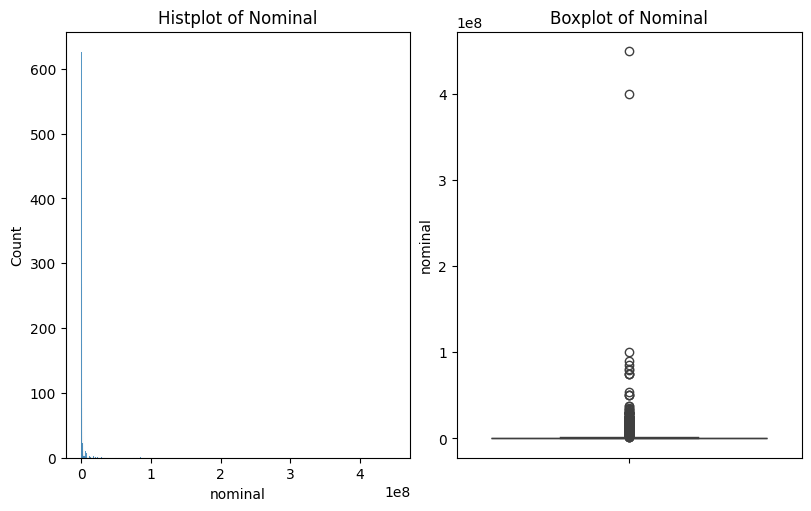

count    4.126000e+03
mean     1.771107e+06
std      1.071346e+07
min      1.000000e+00
25%      1.894375e+05
50%      3.750000e+05
75%      9.634850e+05
max      4.500000e+08
Name: nominal, dtype: float64


In [19]:
# Univariate Analysis of Numerical variables Umur
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["nominal"], ax=ax[0])
sns.boxplot(data=df["nominal"], ax=ax[1])
ax[0].set_title("Histplot of Nominal")
ax[1].set_title("Boxplot of Nominal")
plt.show()
print(df["nominal"].describe())

In [20]:
maxx1 = df[df["nominal"] == df["nominal"].max()].index
df.drop(maxx1, axis=0, inplace=True)

maxx2 = df[df["nominal"] == df["nominal"].max()].index
df.drop(maxx2, axis=0, inplace=True)

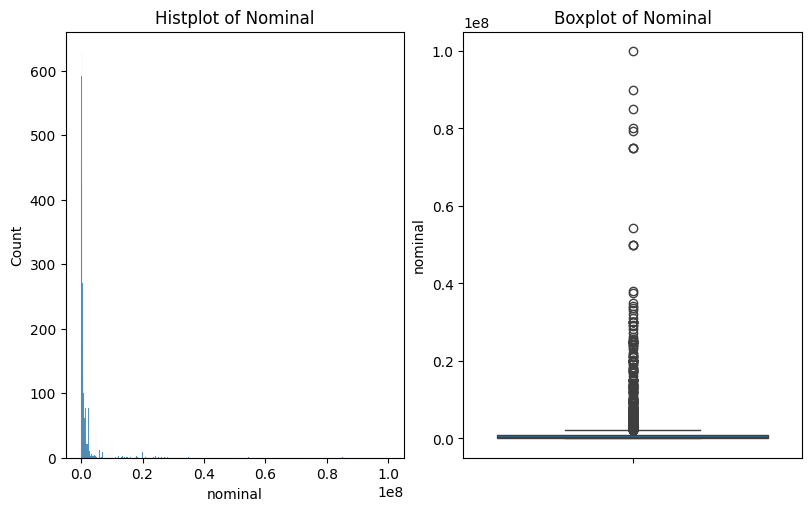

count    4.124000e+03
mean     1.565855e+06
std      5.253483e+06
min      1.000000e+00
25%      1.892500e+05
50%      3.750000e+05
75%      9.612350e+05
max      1.000000e+08
Name: nominal, dtype: float64


In [21]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["nominal"], ax=ax[0])
sns.boxplot(data=df["nominal"], ax=ax[1])
ax[0].set_title("Histplot of Nominal")
ax[1].set_title("Boxplot of Nominal")
plt.show()
print(df["nominal"].describe())

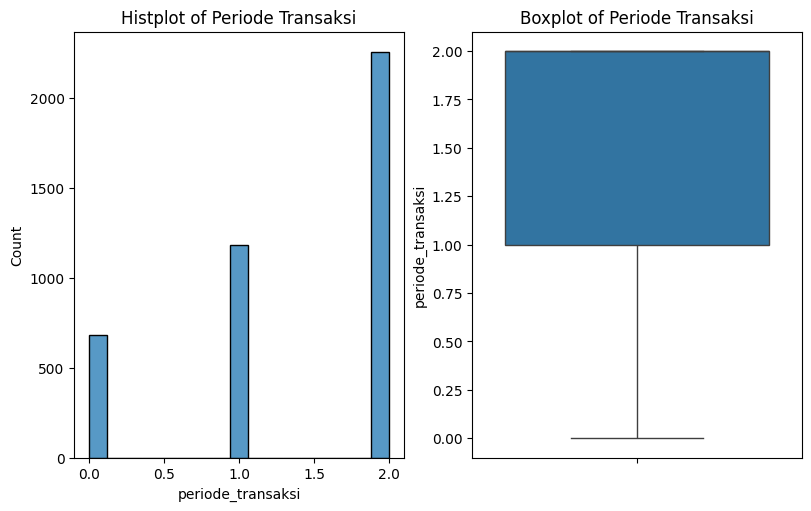

count    4124.000000
mean        1.382153
std         0.752992
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: periode_transaksi, dtype: float64


In [22]:
# Univariate Analysis of Numerical variables periode_transaksi
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["periode_transaksi"], ax=ax[0])
sns.boxplot(data=df["periode_transaksi"], ax=ax[1])
ax[0].set_title("Histplot of Periode Transaksi")
ax[1].set_title("Boxplot of Periode Transaksi")
plt.show()
print(df["periode_transaksi"].describe())

## Bivariate Analysis


In [23]:
df.head()

,umur,gender,occupation,nominal,periode_transaksi
0,62,1,Amil,800000,2
1,4,1,Amil,375000,2
2,72,0,Ketua Dewan Pengawas Syariah PT PNM,5000000,2
3,80,0,Amil,1237500,2
7,65,0,Lain-lain,25000000,2


Text(0.5, 1.0, 'Gender vs Umur')

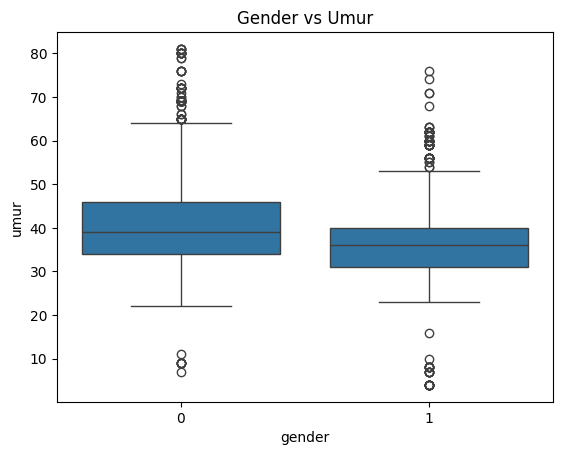

In [24]:
# Bivariate Analysis of gender vs umur
sns.boxplot(data=df, x="gender", y="umur")
plt.title("Gender vs Umur")

Text(0.5, 1.0, 'Periode Transaksi vs Nominal')

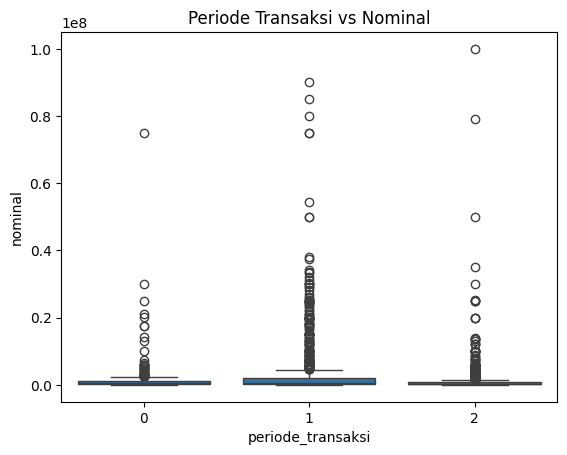

In [25]:
# Bivariate Analysis of periode_transaksi vs nominal
sns.boxplot(data=df, x="periode_transaksi", y="nominal")
plt.title("Periode Transaksi vs Nominal")

Text(0.5, 1.0, 'Periode Transaksi vs Umur')

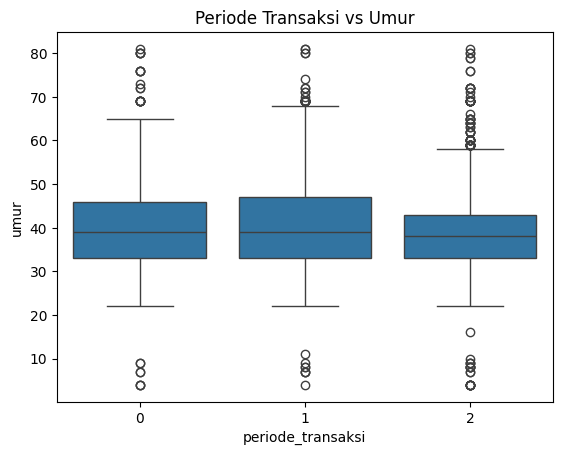

In [26]:
# Bivariate Analysis of periode_transaksi vs umur
sns.boxplot(data=df, x="periode_transaksi", y="umur")
plt.title("Periode Transaksi vs Umur")

Text(0.5, 1.0, 'Periode Gender vs Nominal')

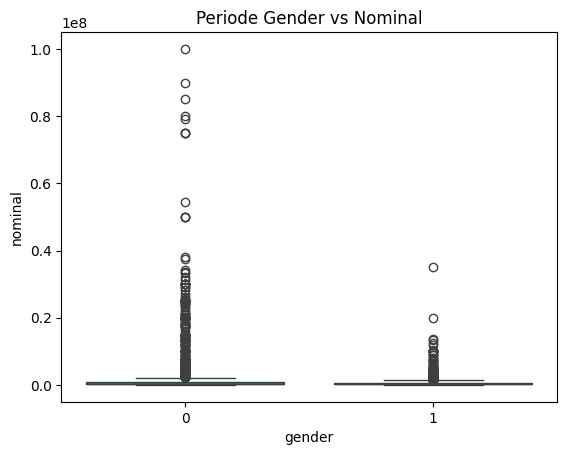

In [27]:
# Bivariate Analysis of gender vs nominal
sns.boxplot(data=df, x="gender", y="nominal")
plt.title("Periode Gender vs Nominal")

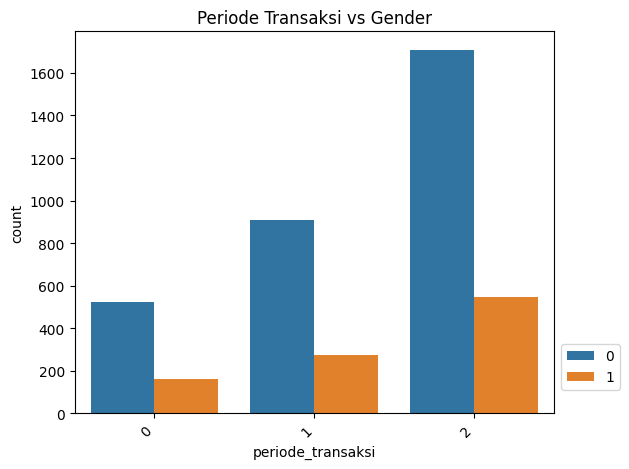

In [28]:
# Bivariate Analysis of Categorical Variables Gender vs Periode Transaksi
ax = sns.countplot(data=df, x="periode_transaksi", hue="gender")
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.title("Periode Transaksi vs Gender")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Umur vs Nominal')

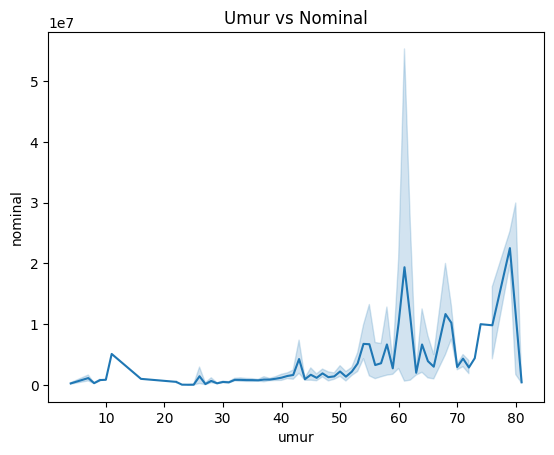

In [29]:
# Bivariate Analysis of umur vs nominal
sns.lineplot(data=df, x="umur", y="nominal")
plt.title("Umur vs Nominal")

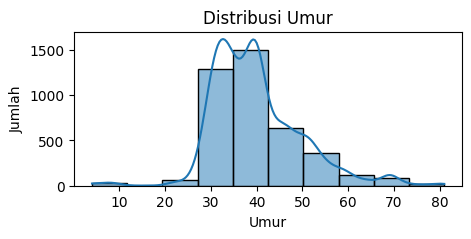

In [30]:
# Visualisasi distribusi umur
plt.figure(figsize=(5, 2))
sns.histplot(df['umur'], bins=10, kde=True)
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.show()

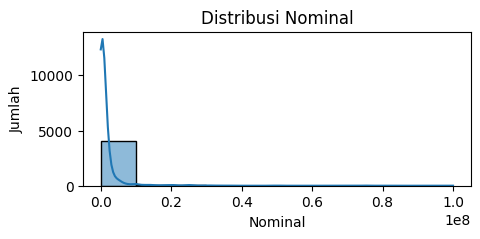

In [31]:
# Visualisasi distribusi umur
plt.figure(figsize=(5, 2))
sns.histplot(df['nominal'], bins=10, kde=True)
plt.title('Distribusi Nominal')
plt.xlabel('Nominal')
plt.ylabel('Jumlah')
plt.show()

# Modelling

## Clustering

Lets cluster it first for get categorical variables

In [32]:
df_cluster = df.copy()
df_cluster.head()

,umur,gender,occupation,nominal,periode_transaksi
0,62,1,Amil,800000,2
1,4,1,Amil,375000,2
2,72,0,Ketua Dewan Pengawas Syariah PT PNM,5000000,2
3,80,0,Amil,1237500,2
7,65,0,Lain-lain,25000000,2


In [33]:
df_cluster.shape

(4124, 5)

In [34]:
scaler = RobustScaler().fit(df_cluster["nominal"].to_numpy().reshape(-1, 1))
nominal = scaler.transform(df_cluster["nominal"].to_numpy().reshape(-1, 1))
df_cluster = pd.DataFrame(nominal.ravel(), columns=["nominal"])
df_cluster

,nominal
0,0.550529
1,0.000000
2,5.991049
3,1.117250
4,31.898288
...,...
4119,0.291456
4120,0.129536
4121,-0.356225
4122,2.752644


C:\Users\DHONI HANIF\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\DHONI HANIF\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DHONI HANIF\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DHONI HANIF\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DHONI HANIF\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

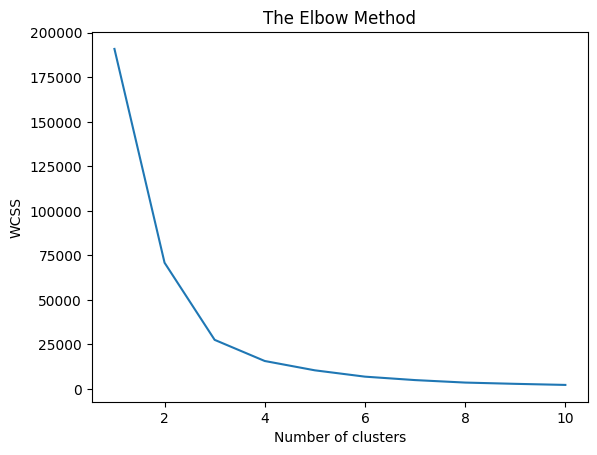

In [35]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
from sklearn.metrics import silhouette_score

# Instantiate the KMeans for 4 clusters
km = KMeans(n_clusters=4, random_state=42)
# Fit the KMeans model
km.fit(df_cluster)
# Calculate Silhoutte Score
score = silhouette_score(df_cluster, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

C:\Users\DHONI HANIF\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouetter Average Score: 0.858


In [37]:
y = km.predict(df_cluster)
df_cluster["result"] = y

df_cluster["nominal"] = scaler.inverse_transform(nominal).ravel()
df_cluster.head()

,nominal,result
0,800000.0,0
1,375000.0,0
2,5000000.0,2
3,1237500.0,0
4,25000000.0,1


In [38]:
df["result"] = y
df.head()

,umur,gender,occupation,nominal,periode_transaksi,result
0,62,1,Amil,800000,2,0
1,4,1,Amil,375000,2,0
2,72,0,Ketua Dewan Pengawas Syariah PT PNM,5000000,2,2
3,80,0,Amil,1237500,2,0
7,65,0,Lain-lain,25000000,2,1


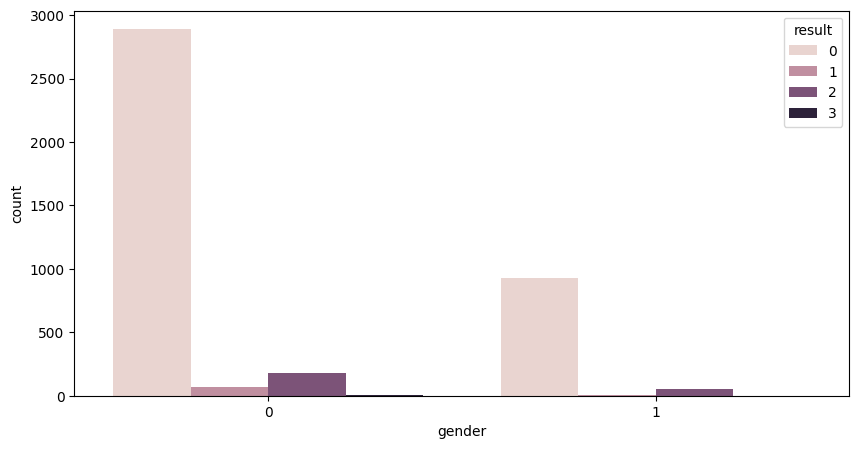

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(data=df, x="gender", hue="result")
plt.show()

<Axes: xlabel='result', ylabel='umur'>

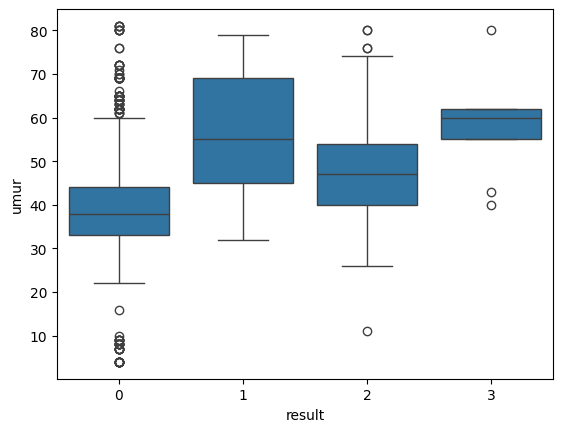

In [40]:
sns.boxplot(data=df, x="result", y="umur")

<Axes: xlabel='result', ylabel='nominal'>

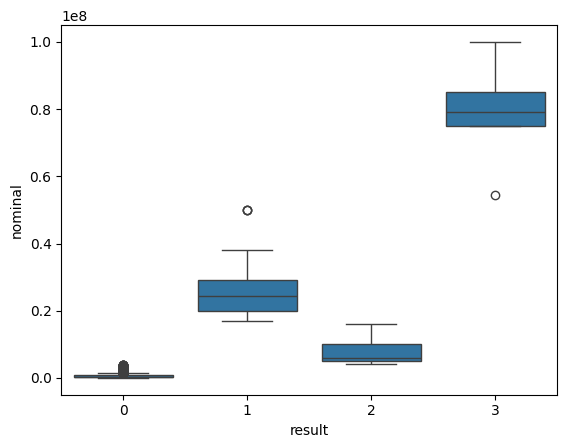

In [41]:
sns.boxplot(data=df, x="result", y="nominal")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


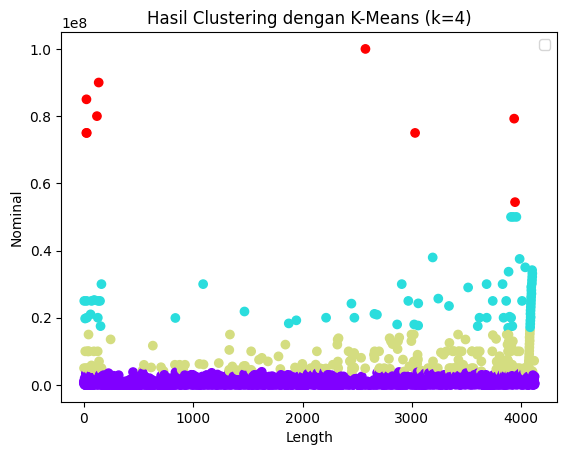

In [42]:
# Lihat data nominal
# Plot hasil clustering
plt.scatter(range(len(df)), df["nominal"], c=df['result'], cmap='rainbow')
plt.xlabel('Length')
plt.ylabel('Nominal')
plt.title('Hasil Clustering dengan K-Means (k=4)')
plt.legend()
plt.show()


In [43]:
df["result"].value_counts()

0    3816
2     230
1      69
3       9
Name: result, dtype: int64

In [44]:
result = {0: "Nominal rendah", 3: "Nominal sedang", 2: "Nominal diatas rata-rata", 1: "Nominal tinggi"}

resultt = [result[i] for i in df["result"]]
df["kategori_nominal"] = resultt
df.drop("result", axis=1, inplace=True)
df.head()

,umur,gender,occupation,nominal,periode_transaksi,kategori_nominal
0,62,1,Amil,800000,2,Nominal rendah
1,4,1,Amil,375000,2,Nominal rendah
2,72,0,Ketua Dewan Pengawas Syariah PT PNM,5000000,2,Nominal diatas rata-rata
3,80,0,Amil,1237500,2,Nominal rendah
7,65,0,Lain-lain,25000000,2,Nominal tinggi


In [45]:
df["kategori_nominal"].value_counts()

Nominal rendah              3816
Nominal diatas rata-rata     230
Nominal tinggi                69
Nominal sedang                 9
Name: kategori_nominal, dtype: int64

In [46]:
df[df["kategori_nominal"] == "Nominal rendah"]["nominal"].describe()

count    3.816000e+03
mean     6.068329e+05
std      7.080907e+05
min      1.000000e+00
25%      1.800000e+05
50%      3.334485e+05
75%      7.271195e+05
max      3.906069e+06
Name: nominal, dtype: float64

In [47]:
df[df["kategori_nominal"] == "Nominal diatas rata-rata"]["nominal"].describe()

count    2.300000e+02
mean     7.302684e+06
std      3.213377e+06
min      4.000000e+06
25%      5.000000e+06
50%      6.000000e+06
75%      1.000000e+07
max      1.616516e+07
Name: nominal, dtype: float64

In [48]:
df[df["kategori_nominal"] == "Nominal sedang"]["nominal"].describe()

count    9.000000e+00
mean     7.929444e+07
std      1.250721e+07
min      5.440000e+07
25%      7.500000e+07
50%      7.925000e+07
75%      8.500000e+07
max      1.000000e+08
Name: nominal, dtype: float64

In [49]:
df[df["kategori_nominal"] == "Nominal tinggi"]["nominal"].describe()

count    6.900000e+01
mean     2.534268e+07
std      7.474486e+06
min      1.700000e+07
25%      2.000000e+07
50%      2.427000e+07
75%      2.916516e+07
max      5.000000e+07
Name: nominal, dtype: float64

In [50]:
df.to_csv("data_baru2.csv")

In [51]:
# Mengambil 10 sampel acak dari data menggunakan metode random sampling
n = 10
random_sample = df.sample(n)
print(random_sample)

      umur  gender     occupation  nominal  periode_transaksi kategori_nominal
2575    34       0           Amil   267932                  0   Nominal rendah
4624    40       1  Tidak Bekerja   188750                  2   Nominal rendah
6452    45       0           Amil   256460                  0   Nominal rendah
901     30       0      Konsultan   402437                  2   Nominal rendah
7068    49       0        Bekerja   685000                  2   Nominal rendah
8148    69       0     Wiraswasta   100000                  0   Nominal rendah
1143    31       0       Asuransi   332627                  2   Nominal rendah
5217    40       0  Tidak Bekerja   187481                  2   Nominal rendah
4615    40       1      Konsultan  1093074                  2   Nominal rendah
1102    30       0           Amil   587500                  0   Nominal rendah


In [52]:
columns = {}
for i in df.columns:
    if df[i].dtype == "object" or df[i].dtype == "category":
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])


In [53]:
from sklearn.model_selection import train_test_split

# train_df akan berisi data pelatihan
# test_df akan berisi data pengujian
# Pisahkan data menjadi data pelatihan (80%) dan data pengujian (20%)

X = df.drop(['kategori_nominal', "nominal"], axis=1)  # 'nominal' adalah variabel target
y = df['kategori_nominal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Menampilkan hasil pemisahan
print("Data Pelatihan:")
print(X_train)
print(y_train)

print("\nData Pengujian:")
print(X_test)
print(y_test)

Data Pelatihan:
      umur  gender  occupation  periode_transaksi
6264    44       0         120                  0
4851    40       0           5                  2
3539    37       1          49                  0
7191    50       0          12                  0
6646    46       0          35                  0
...    ...     ...         ...                ...
6831    48       0          12                  2
961     30       0          54                  2
6104    44       0         120                  1
7543    52       0         117                  2
1760    32       0          52                  2

[3299 rows x 4 columns]
6264    1
4851    1
3539    1
7191    1
6646    1
       ..
6831    1
961     1
6104    1
7543    0
1760    1
Name: kategori_nominal, Length: 3299, dtype: int32

Data Pengujian:
      umur  gender  occupation  periode_transaksi
2200    33       1          79                  2
3323    36       0         117                  2
7964    57       0         117 

## Model C4.5

In [55]:
model_c45 = DecisionTreeClassifier(criterion='entropy')  # Gunakan 'entropy' atau 'gini' sebagai kriteria pemisahan
model_c45.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
# Fungsi untuk menghitung entropy
def calculate_entropy(data):
    total_samples = len(data)
    value_counts = data.value_counts()
    probabilities = value_counts / total_samples
    entropy = -sum(probabilities * np.log2(probabilities))
    return entropy

# Hitung entropy untuk setiap variabel kategorikal
columns_to_analyze = ['umur', 'gender', 'occupation', 'periode_transaksi', 'kategori_nominal']

for column in columns_to_analyze:
    entropy = calculate_entropy(df[column])
    print(f"Entropy for {column}: {entropy}")

Entropy for umur: 4.982153824127387
Entropy for gender: 0.7914900099385381
Entropy for occupation: 4.972067434086889
Entropy for periode_transaksi: 1.422030204442648
Entropy for kategori_nominal: 0.45389785006332833


In [57]:
y_pred = model_c45.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

Akurasi: 0.9127272727272727
Precision: 0.9021134586044385
Recall: 0.9127272727272727
Confusion Matrix:
[[ 12  34   1   2]
 [ 17 732   0   7]
 [  0   0   1   1]
 [  4   5   1   8]]


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.24      0.29        49
           1       0.95      0.97      0.96       756
           2       0.33      0.50      0.40         2
           3       0.44      0.44      0.44        18

    accuracy                           0.91       825
   macro avg       0.52      0.54      0.52       825
weighted avg       0.90      0.91      0.91       825



Karna datanya sangat imbalance setelah diclustering sehingga menghasilkan kinerja model yang buruk, mari kita cluster secara manual

In [59]:
df.shape

(4124, 6)

In [60]:
categorical = []
for i in df.columns:
    if i in columns:
        df[i] = columns[i].inverse_transform(df[i])

for i in df.index:
    if df.loc[i, "nominal"] <= 1000000:
        categorical.append("Nominal rendah")
    elif df.loc[i, "nominal"] <= 3000000:
        categorical.append("Nominal sedang")
    elif df.loc[i, "nominal"] <= 10000000:
        categorical.append("Nominal diatas rata-rata")
    else:
        categorical.append("Nominal tinggi")

df["kategori_nominal"] = categorical
df.head()

,umur,gender,occupation,nominal,periode_transaksi,kategori_nominal
0,62,1,Amil,800000,2,Nominal rendah
1,4,1,Amil,375000,2,Nominal rendah
2,72,0,Ketua Dewan Pengawas Syariah PT PNM,5000000,2,Nominal diatas rata-rata
3,80,0,Amil,1237500,2,Nominal sedang
7,65,0,Lain-lain,25000000,2,Nominal tinggi


In [61]:
df["kategori_nominal"].value_counts()

Nominal rendah              3174
Nominal sedang               603
Nominal diatas rata-rata     231
Nominal tinggi               116
Name: kategori_nominal, dtype: int64

## Modelling ulang

In [62]:
columns = {}
for i in df.columns:
    if df[i].dtype == "object" or df[i].dtype == "category":
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])

df.head()

,umur,gender,occupation,nominal,periode_transaksi,kategori_nominal
0,62,1,12,800000,2,1
1,4,1,12,375000,2,1
2,72,0,50,5000000,2,0
3,80,0,12,1237500,2,2
7,65,0,58,25000000,2,3


In [63]:
# train_df akan berisi data pelatihan
# test_df akan berisi data pengujian
# Pisahkan data menjadi data pelatihan (80%) dan data pengujian (20%)

X = df.drop(['kategori_nominal', "nominal"], axis=1)  # 'nominal' adalah variabel target
y = df['kategori_nominal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3299, 4), (825, 4), (3299,), (825,))

In [64]:
model_c45 = DecisionTreeClassifier(criterion='entropy')  # Gunakan 'entropy' atau 'gini' sebagai kriteria pemisahan
model_c45.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [65]:
# Fungsi untuk menghitung entropy
def calculate_entropy(data):
    total_samples = len(data)
    value_counts = data.value_counts()
    probabilities = value_counts / total_samples
    entropy = -sum(probabilities * np.log2(probabilities))
    return entropy

# Hitung entropy untuk setiap variabel kategorikal
columns_to_analyze = ['umur', 'gender', 'occupation', 'periode_transaksi', 'kategori_nominal']

for column in columns_to_analyze:
    entropy = calculate_entropy(df[column])
    print(f"Entropy for {column}: {entropy}")

Entropy for umur: 4.982153824127387
Entropy for gender: 0.7914900099385381
Entropy for occupation: 4.972067434086889
Entropy for periode_transaksi: 1.422030204442648
Entropy for kategori_nominal: 1.0741257424756434


In [66]:
y_pred = model_c45.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

Akurasi: 0.7866666666666666
Precision: 0.7671214854549846
Recall: 0.7866666666666666
Confusion Matrix:
[[ 13  17  12   3]
 [ 13 588  35   3]
 [ 12  65  39   1]
 [  4   8   3   9]]


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.29      0.30        45
           1       0.87      0.92      0.89       639
           2       0.44      0.33      0.38       117
           3       0.56      0.38      0.45        24

    accuracy                           0.79       825
   macro avg       0.54      0.48      0.51       825
weighted avg       0.77      0.79      0.77       825



In [68]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Buat model Decision Tree
model = DecisionTreeClassifier()

# Data X dan label y telah diinisialisasi sebelumnya

# Lakukan 10-Fold Cross-Validation
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

# Tampilkan hasil cross-validation
print("Hasil Cross-Validation:")
print("Rata-rata Akurasi: ", np.mean(scores))
print("Standar Deviasi Akurasi: ", np.std(scores))

Hasil Cross-Validation:
Rata-rata Akurasi:  0.38980700063471174
Standar Deviasi Akurasi:  0.17707741248163397


In [69]:
from sklearn.model_selection import GridSearchCV

# Inisialisasi model Decision Tree
decision_tree = DecisionTreeClassifier()

# Daftar hyperparameter yang akan diuji
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inisialisasi Grid Search dengan model, parameter grid, dan metrik evaluasi
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)
# Menampilkan hyperparameter terbaik
print("Hyperparameter terbaik:", grid_search.best_params_)

# Evaluasi model terbaik pada data uji
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Akurasi model terbaik:", accuracy)


C:\Users\DHONI HANIF\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\DHONI HANIF\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\DHONI HANIF\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\DHONI HANIF\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 

Hyperparameter terbaik: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}
Akurasi model terbaik: 0.7733333333333333


C:\Users\DHONI HANIF\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [82]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

Akurasi: 0.8084848484848485
Precision: 0.777962663013765
Recall: 0.8084848484848485
Confusion Matrix:
[[ 12  28   6   0]
 [  1 622  13   1]
 [  4  80  25   2]
 [  0  19   4   8]]


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df["umur"].to_numpy().reshape(-1, 1))
X["umur"] = scaler.transform(X["umur"].to_numpy().reshape(-1, 1))
X

,umur,gender,occupation,periode_transaksi
0,2.231519,1,12,2
1,-3.621065,1,12,2
2,3.240585,0,50,2
3,4.047838,0,12,2
7,2.534239,0,58,2
...,...,...,...,...
8143,2.937865,0,12,1
8147,2.937865,0,12,0
8148,2.937865,0,120,0
8149,2.937865,0,12,0


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_c45 = DecisionTreeClassifier(criterion='entropy')  # Gunakan 'entropy' atau 'gini' sebagai kriteria pemisahan
model_c45.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [72]:
# Hitung entropy untuk setiap variabel kategorikal
columns_to_analyze = ['umur', 'gender', 'periode_transaksi', 'kategori_nominal']

for column in columns_to_analyze:
    entropy = calculate_entropy(df[column])
    print(f"Entropy for {column}: {entropy}")

Entropy for umur: 4.982153824127387
Entropy for gender: 0.7914900099385381
Entropy for periode_transaksi: 1.422030204442648
Entropy for kategori_nominal: 1.0741257424756434


In [74]:
y_pred = model_c45.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

Akurasi: 0.7903030303030303
Precision: 0.7645359408033826
Recall: 0.7903030303030303
Confusion Matrix:
[[ 16  21   7   2]
 [ 10 593  28   6]
 [ 13  67  28   3]
 [  7   7   2  15]]


<Axes: >

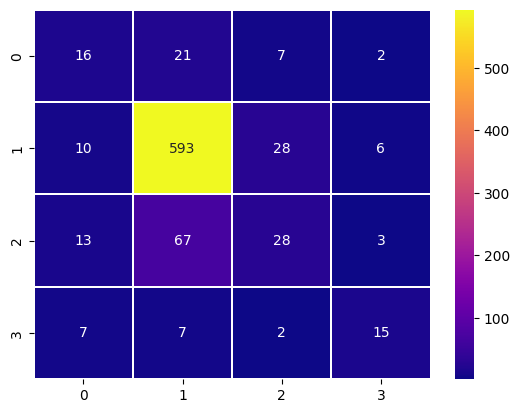

In [76]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="plasma", linewidths=.2, linecolor="white")

In [77]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.11      0.28      0.16        18
           1       0.97      0.78      0.86       791
           2       0.05      0.31      0.08        16
           3       0.00      0.00      0.00         0

    accuracy                           0.76       825
   macro avg       0.28      0.34      0.27       825
weighted avg       0.93      0.76      0.83       825



C:\Users\DHONI HANIF\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DHONI HANIF\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DHONI HANIF\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
X["umur"] = scaler.inverse_transform(X["umur"].to_numpy().reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
model_c45.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [80]:
y_pred = model_c45.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.33      0.33        46
           1       0.86      0.94      0.90       637
           2       0.46      0.25      0.33       111
           3       0.56      0.45      0.50        31

    accuracy                           0.79       825
   macro avg       0.55      0.49      0.51       825
weighted avg       0.77      0.79      0.77       825



<Axes: >

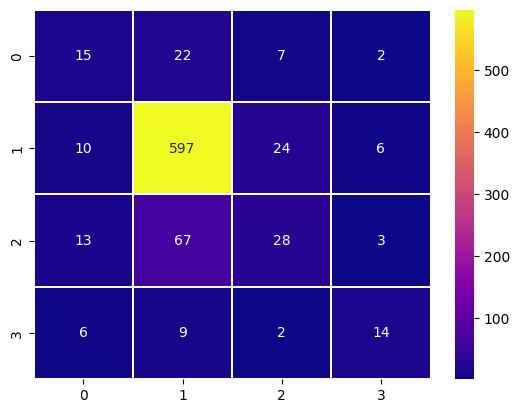

In [81]:
sns.heatmap(data=confusion_matrix(y_test, y_pred), fmt="d", annot=True, cmap="plasma", linewidths=.2, linecolor="white")
